Calculating auto-correlation using convolution, correlation to verify the statsmodels acf

In [ ]:
import numpy as np

# Our data set 
data1 = np.array([3, 16, 156, 47, 246, 176, 233, 140, 130, 
        101, 166, 201, 200, 116, 118, 247, 
        209, 52, 153, 232, 128, 27, 192, 168, 208, 
        187, 228, 86, 30, 151, 18, 254, 
        76, 112, 67, 244, 179, 150, 89, 49, 83, 147, 90, 
        33, 6, 158, 80, 35, 186, 127], dtype = float)
data2 = np.flip(data1)
lags = range(len(data1))

## numpy convolve

50


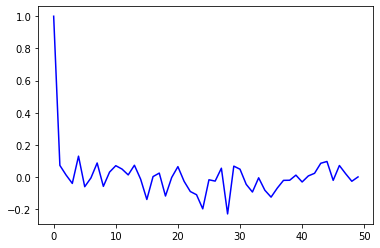

In [65]:
import matplotlib.pyplot as plt

mdata = data1 - np.mean(data1) # Normalize Input
ndata = np.flip(mdata)
conv1 = np.convolve(mdata, ndata, mode='full')[len(mdata)-1:]
print(len(conv1))
conv1 /= np.max(conv1) # Normalize
plt.plot(conv1, color = 'blue')

## scipy correlate

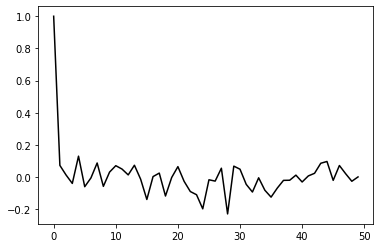

In [61]:
from scipy.signal import correlate

autocorr_mean = correlate(mdata, mdata, mode='full')[len(mdata)-1:]
autocorr_mean /= np.max(autocorr_mean)
plt.plot(autocorr_mean, color = 'black')

## Statsmodels

[ 1.          0.07326561  0.01341434 -0.03866088  0.13064865 -0.05907283
 -0.00449197  0.08829021 -0.05690311  0.03172606  0.07153035  0.05065747
  0.01430394  0.07437754 -0.01216265 -0.13839977  0.00386119  0.02552057
 -0.11687923 -0.00175199  0.06562094 -0.02561668 -0.08905299 -0.10885074
 -0.1965976  -0.01600149 -0.02426782  0.05580897 -0.22811411  0.06873973
  0.04957915 -0.04449608 -0.09213239 -0.00372904 -0.08097552 -0.12382089
 -0.06773835 -0.01965541 -0.01889643  0.01284286 -0.0297265   0.00796782
  0.02421582  0.08657806  0.09768763 -0.01966484  0.07269079  0.02189144
 -0.02530615  0.00174636]


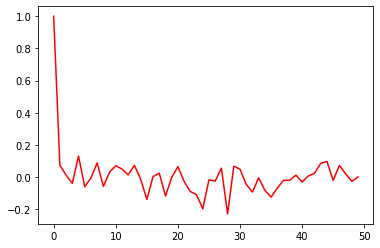

In [54]:
import statsmodels.api as sm
acorr = sm.tsa.acf(data1, nlags = len(lags)-1)
#acorr = np.flip(acorr)
print(acorr)
plt.plot(acorr, color = 'red')

## Overlap of graphs

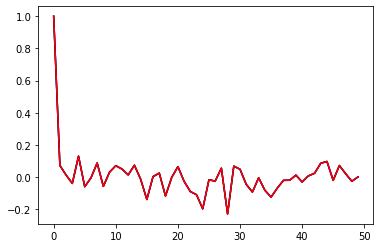

In [66]:
plt.plot(conv1, color = 'blue')
plt.plot(autocorr_mean, color = 'black')
plt.plot(acorr, color = 'red')